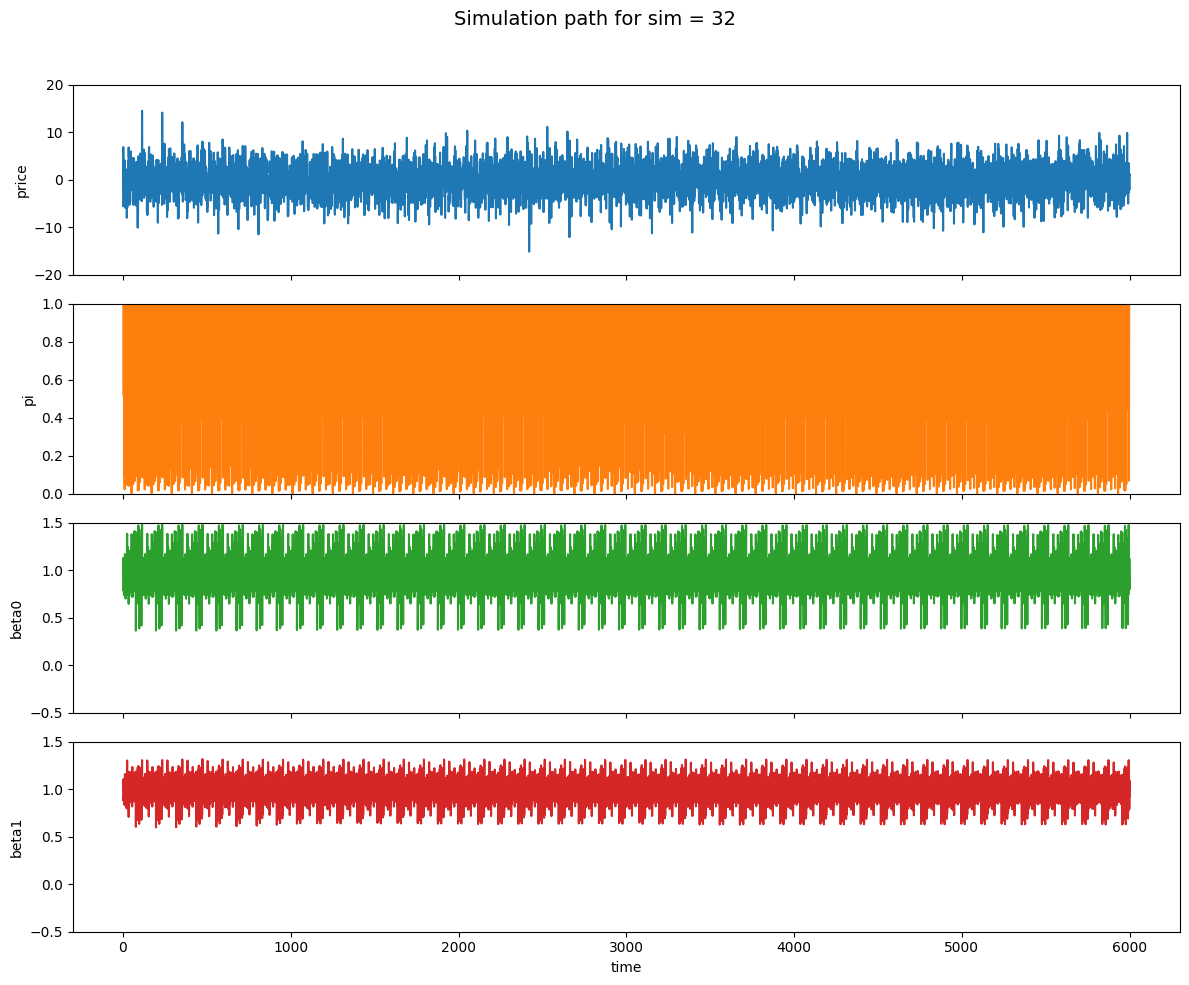

In [2]:
import pandas as pd
import numpy as np
import random

# new cell (index 0) - plot a random simulation path from ehsw_path.csv
import matplotlib.pyplot as plt

# read data
fn = "ehsw_path.csv"
df = pd.read_csv(fn)

# check required columns
required = {"sim", "time", "price", "pi", "beta0", "beta1"}
missing = required - set(df.columns)
if missing:
    raise ValueError(f"Missing columns in {fn}: {missing}")

# pick a random simulation
sims = df["sim"].unique()
random_sim = int(np.random.choice(sims))
df_sim = df[df["sim"] == random_sim].sort_values("time")

# ensure time is numeric for plotting
x = df_sim["time"].values

# prepare plot
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

axes[0].plot(x, df_sim["price"], color="C0")
axes[0].set_ylabel("price")
axes[0].set_ylim(-20, 20)

axes[1].plot(x, df_sim["pi"], color="C1")
axes[1].set_ylabel("pi")
axes[1].set_ylim(0, 1)

axes[2].plot(x, df_sim["beta0"], color="C2")
axes[2].set_ylabel("beta0")
axes[2].set_ylim(-0.5, 1.5)

axes[3].plot(x, df_sim["beta1"], color="C3")
axes[3].set_ylabel("beta1")
axes[3].set_ylim(-0.5, 1.5)
axes[3].set_xlabel("time")

fig.suptitle(f"Simulation path for sim = {random_sim}", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

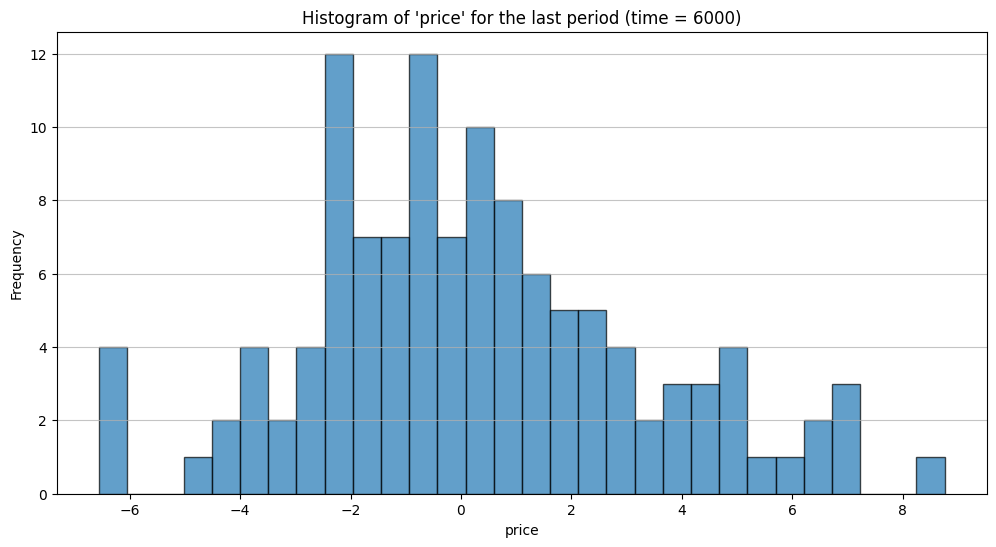

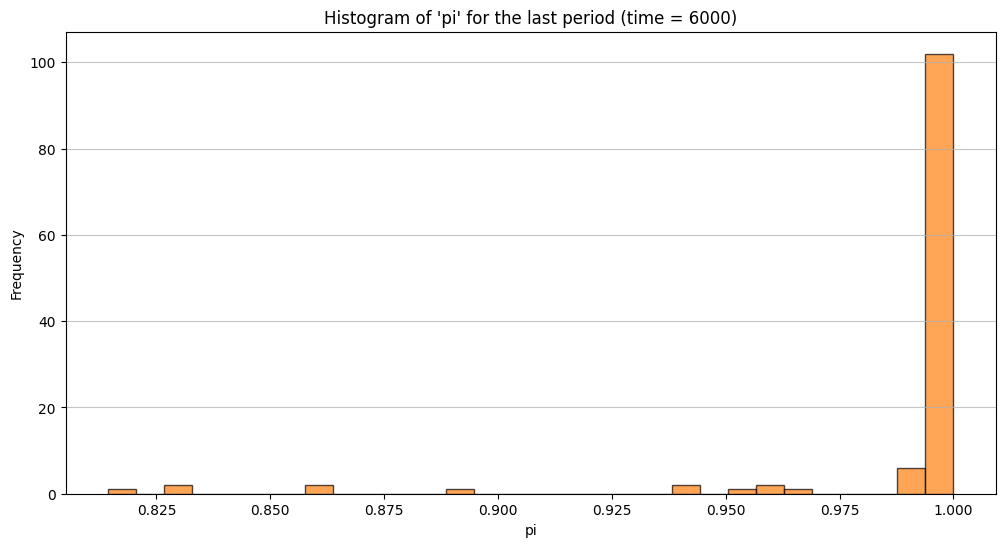

In [5]:
# Filter the dataframe for the last period (time == 6000)
last_period = df[df["time"] == 6000]

# Plot histogram for "price"
plt.figure(figsize=(12, 6))
plt.hist(last_period["price"], bins=30, color="C0", alpha=0.7, edgecolor="black")
plt.title("Histogram of 'price' for the last period (time = 6000)")
plt.xlabel("price")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)
plt.show()


# Save the histogram for "price"
plt.figure(figsize=(12, 6))
plt.hist(last_period["pi"], bins=30, color="C1", alpha=0.7, edgecolor="black")
plt.title("Histogram of 'pi' for the last period (time = 6000)")
plt.xlabel("pi")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)
plt.show()









In [7]:
# Save the histogram for "price"
plt.figure(figsize=(12, 6))
plt.hist(last_period["price"], bins=30, color="C0", alpha=0.7, edgecolor="black")
plt.title("Histogram of 'price' for the last period (time = 6000)")
plt.xlabel("price")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)
plt.savefig("ehsw_price_6000.png")
plt.close()

# Save the histogram for "pi"
plt.figure(figsize=(12, 6))
plt.hist(last_period["pi"], bins=30, color="C1", alpha=0.7, edgecolor="black")
plt.title("Histogram of 'pi' for the last period (time = 6000)")
plt.xlabel("pi")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)
plt.savefig("ehsw_pi_6000.png")
plt.close()

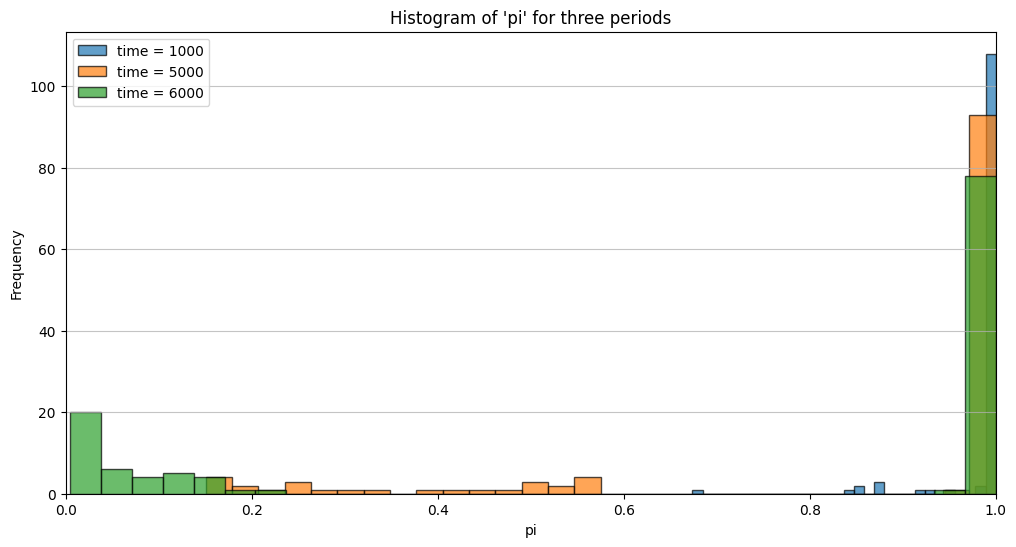

In [4]:
# Filter the dataframe for the specified periods
periods = [1000, 5000, 6000]
data_by_period = {period: df[df["time"] == period]["pi"] for period in periods}

# Plot histograms for "pi" for the specified periods on the same plot
plt.figure(figsize=(12, 6))
for period, data in data_by_period.items():
    plt.hist(data, bins=30, alpha=0.7, label=f"time = {period}", edgecolor="black")

plt.title("Histogram of 'pi' for three periods")
plt.xlabel("pi")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis="y", alpha=0.75)
plt.xlim(0, 1)
plt.show()

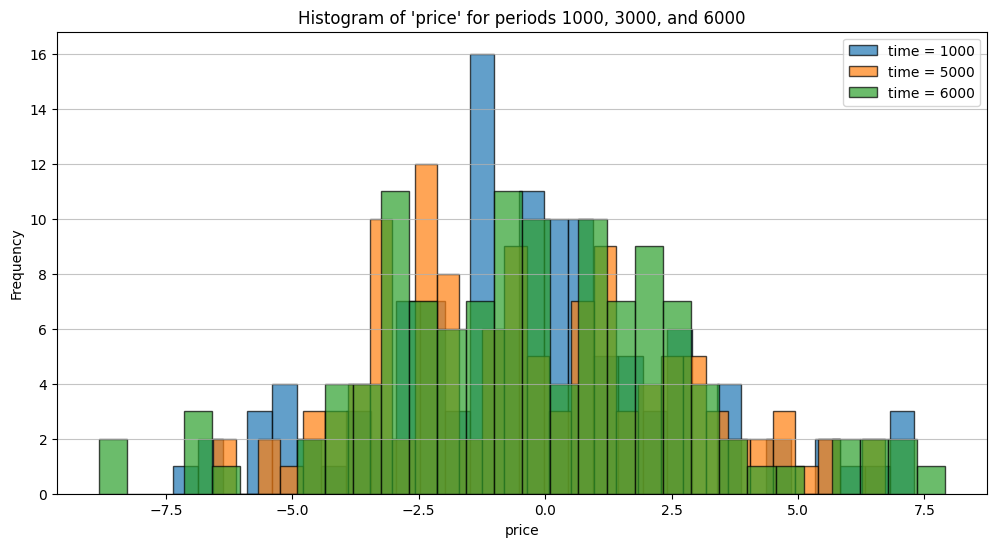

In [5]:
# Filter the dataframe for the specified periods
data_by_period_price = {period: df[df["time"] == period]["price"] for period in periods}

# Plot histograms for "price" for the specified periods on the same plot
plt.figure(figsize=(12, 6))
for period, data in data_by_period_price.items():
    plt.hist(data, bins=30, alpha=0.7, label=f"time = {period}", edgecolor="black")

plt.title("Histogram of 'price' for periods 1000, 3000, and 6000")
plt.xlabel("price")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis="y", alpha=0.75)
plt.show()

In [6]:
# Save histograms for "pi" for the specified periods
plt.figure(figsize=(12, 6))
for period, data in data_by_period.items():
    plt.hist(data, bins=30, alpha=0.7, label=f"time = {period}", edgecolor="black")

plt.title("Histogram of 'pi' for periods 1000, 3000, and 6000")
plt.xlabel("pi")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis="y", alpha=0.75)
plt.savefig("histogram_pi_three_periods.png")
plt.close()